# Diabetes Dataset

https://www.kaggle.com/competitions/diabetes-prediction-with-nn/overview


In this Kaggle challenge, the goal is to develop a predictive model to determine whether individuals have diabetes based on their symptoms. The dataset includes various features such as age, gender, and medical indicators like blood glucose levels.  The challenge involves preprocessing the data, selecting appropriate features, and tuning the model to achieve high accuracy. Participants are required to explore different classification techniques, validate their models using appropriate metrics, and submit predictions to assess their model’s performance against a held-out test set.

# Data Preprocessing and Visualization

In [3]:
#Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score


In [4]:
from google.colab import files

uploaded = files.upload()

for filename, content in uploaded.items():
    print(f"Uploaded file: {filename}, size: {len(content)} bytes")

Saving train[1].csv to train[1].csv
Uploaded file: train[1].csv, size: 20534 bytes


In [5]:
df = pd.read_csv('train[1].csv')
df.head()


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,1,4,99,76,15,51,23.2,0.223,21,0
1,2,0,102,52,0,0,25.1,0.078,21,0
2,3,3,126,88,41,235,39.3,0.704,27,0
3,4,5,109,75,26,0,36.0,0.546,60,0
4,5,4,156,75,0,0,48.3,0.238,32,1


In [6]:
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        600 non-null    int64  
 1   Pregnancies               600 non-null    int64  
 2   Glucose                   600 non-null    int64  
 3   BloodPressure             600 non-null    int64  
 4   SkinThickness             600 non-null    int64  
 5   Insulin                   600 non-null    int64  
 6   BMI                       600 non-null    float64
 7   DiabetesPedigreeFunction  600 non-null    float64
 8   Age                       600 non-null    int64  
 9   label                     600 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


(None,
    id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0   1            4       99             76             15       51  23.2   
 1   2            0      102             52              0        0  25.1   
 2   3            3      126             88             41      235  39.3   
 3   4            5      109             75             26        0  36.0   
 4   5            4      156             75              0        0  48.3   
 
    DiabetesPedigreeFunction  Age  label  
 0                     0.223   21      0  
 1                     0.078   21      0  
 2                     0.704   27      0  
 3                     0.546   60      0  
 4                     0.238   32      1  )

In [7]:
df.shape

(600, 10)

In [8]:
df.describe()


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,300.500000,3.808333,121.616667,69.931667,20.921667,81.878333,31.774667,0.470147,33.21500,0.360000
std,173.349358,3.324156,31.846822,17.436946,15.697438,117.774410,7.798777,0.327129,11.90455,0.480401
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.00000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.375000,0.243250,24.00000,0.000000
50%,300.500000,3.000000,117.000000,72.000000,23.000000,40.500000,31.750000,0.377000,29.00000,0.000000
75%,450.250000,6.000000,142.250000,80.000000,32.000000,129.250000,36.500000,0.617250,41.00000,1.000000
max,600.000000,14.000000,199.000000,122.000000,99.000000,846.000000,53.200000,2.329000,81.00000,1.000000


In [9]:
missing_values=df.isnull().sum()
missing_values

,0
id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
label,0


In [10]:
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:  \n", invalid_entries)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicates)

Invalid Entries:  
 id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
label                       0
dtype: int64

Number of Duplicate Records: 0


In [11]:
unique_target_values = df['Glucose'].unique()
if len(unique_target_values) == 2:
  # Binary classification
  print("This is a binary classification problem.")
else:
  # Regression
  print("This is a regression problem.")

This is a regression problem.


In [12]:
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Unique entries in the column above\n\n '{column}': {unique_entries}")

Unique entries in the column above

 'id': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

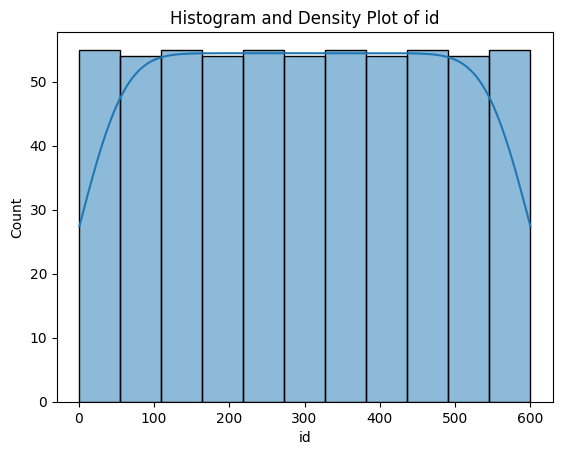

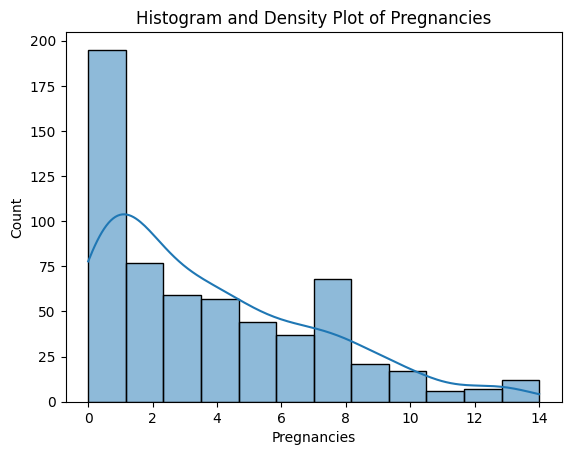

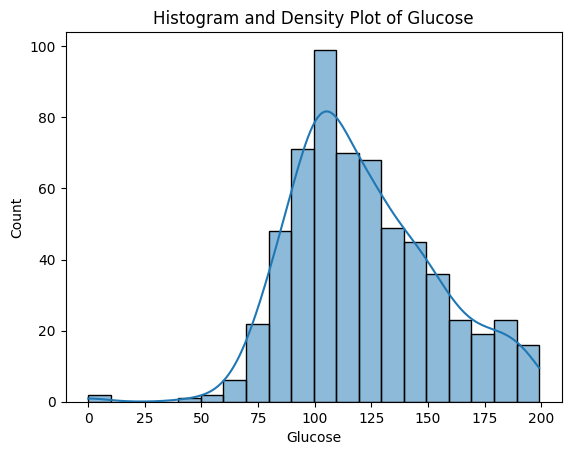

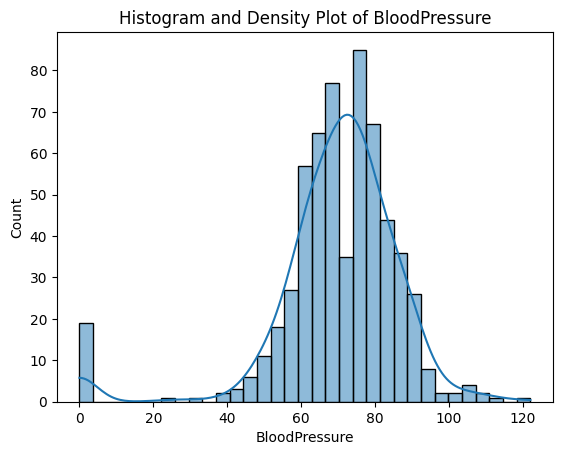

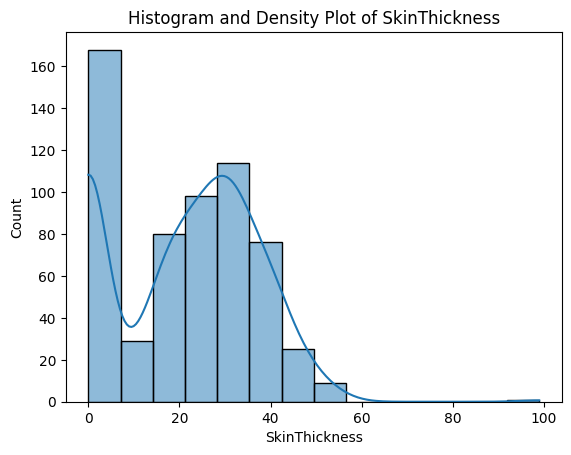

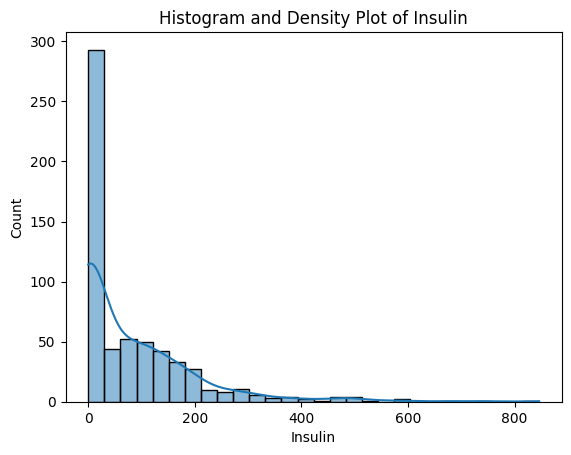

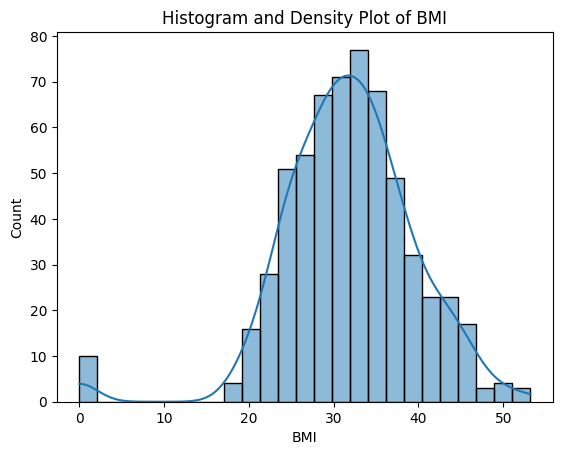

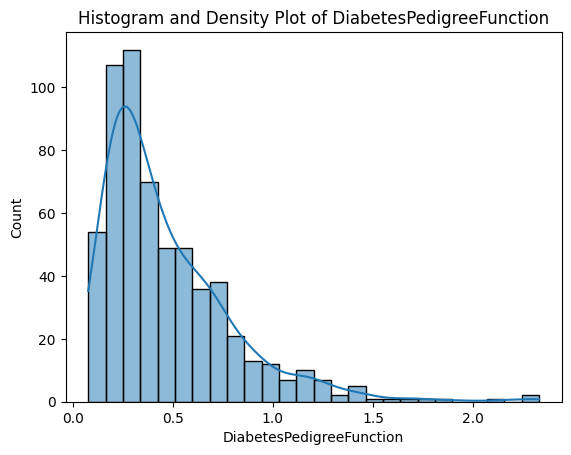

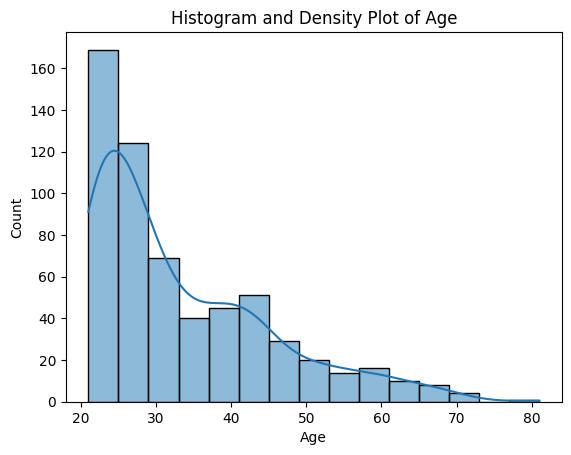

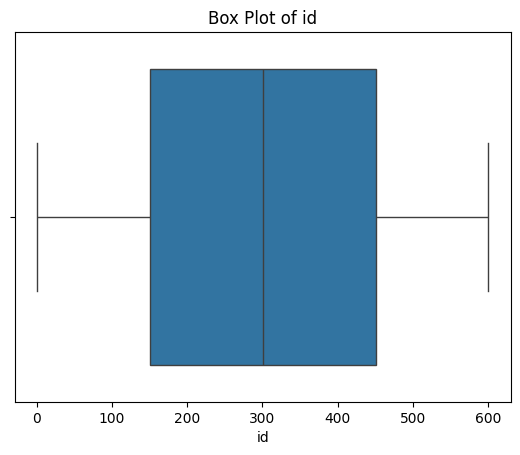

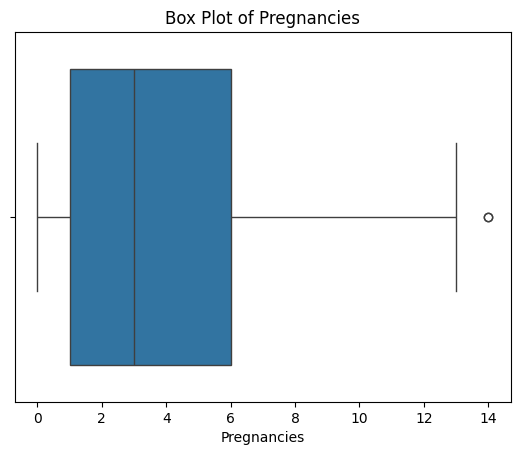

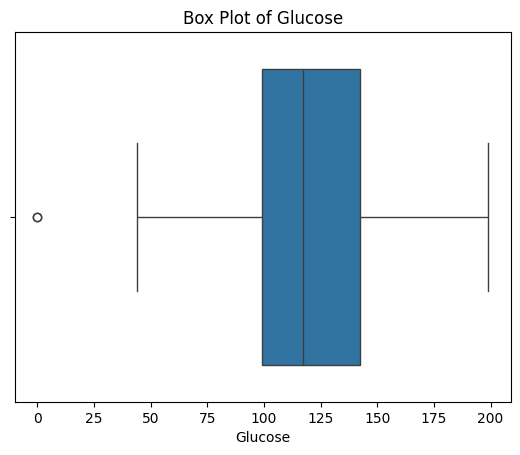

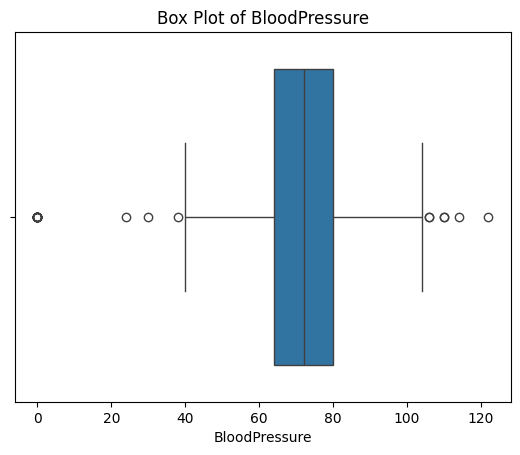

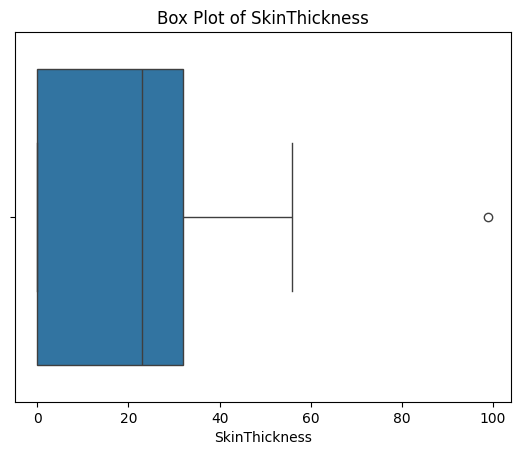

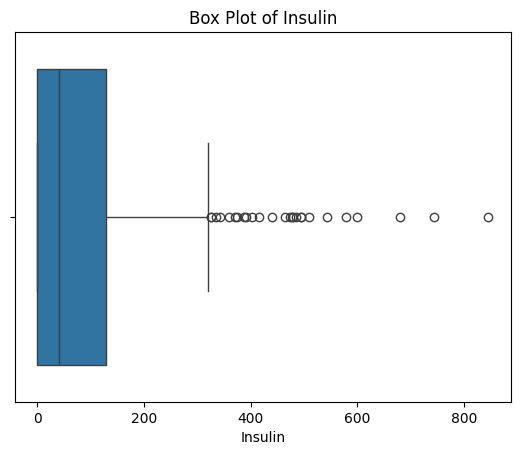

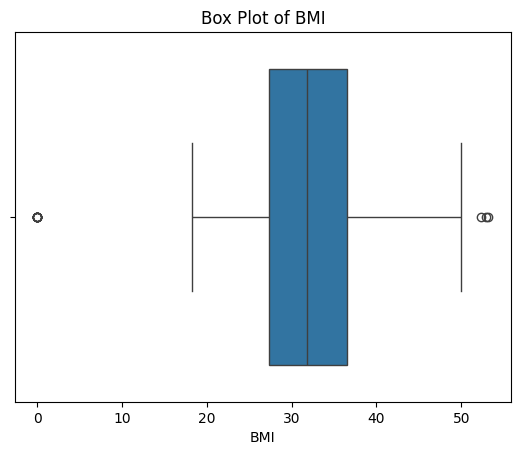

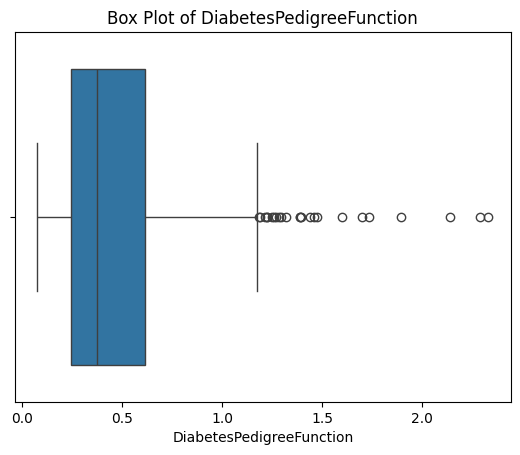

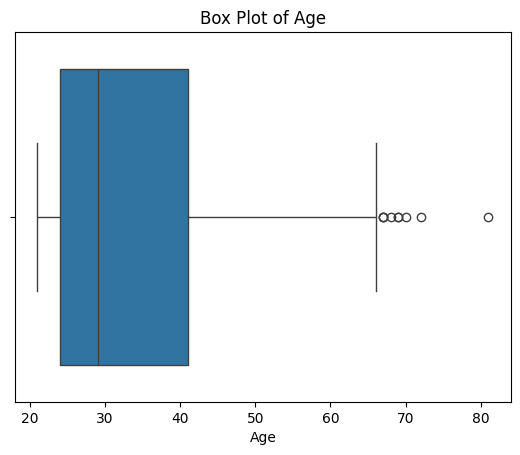

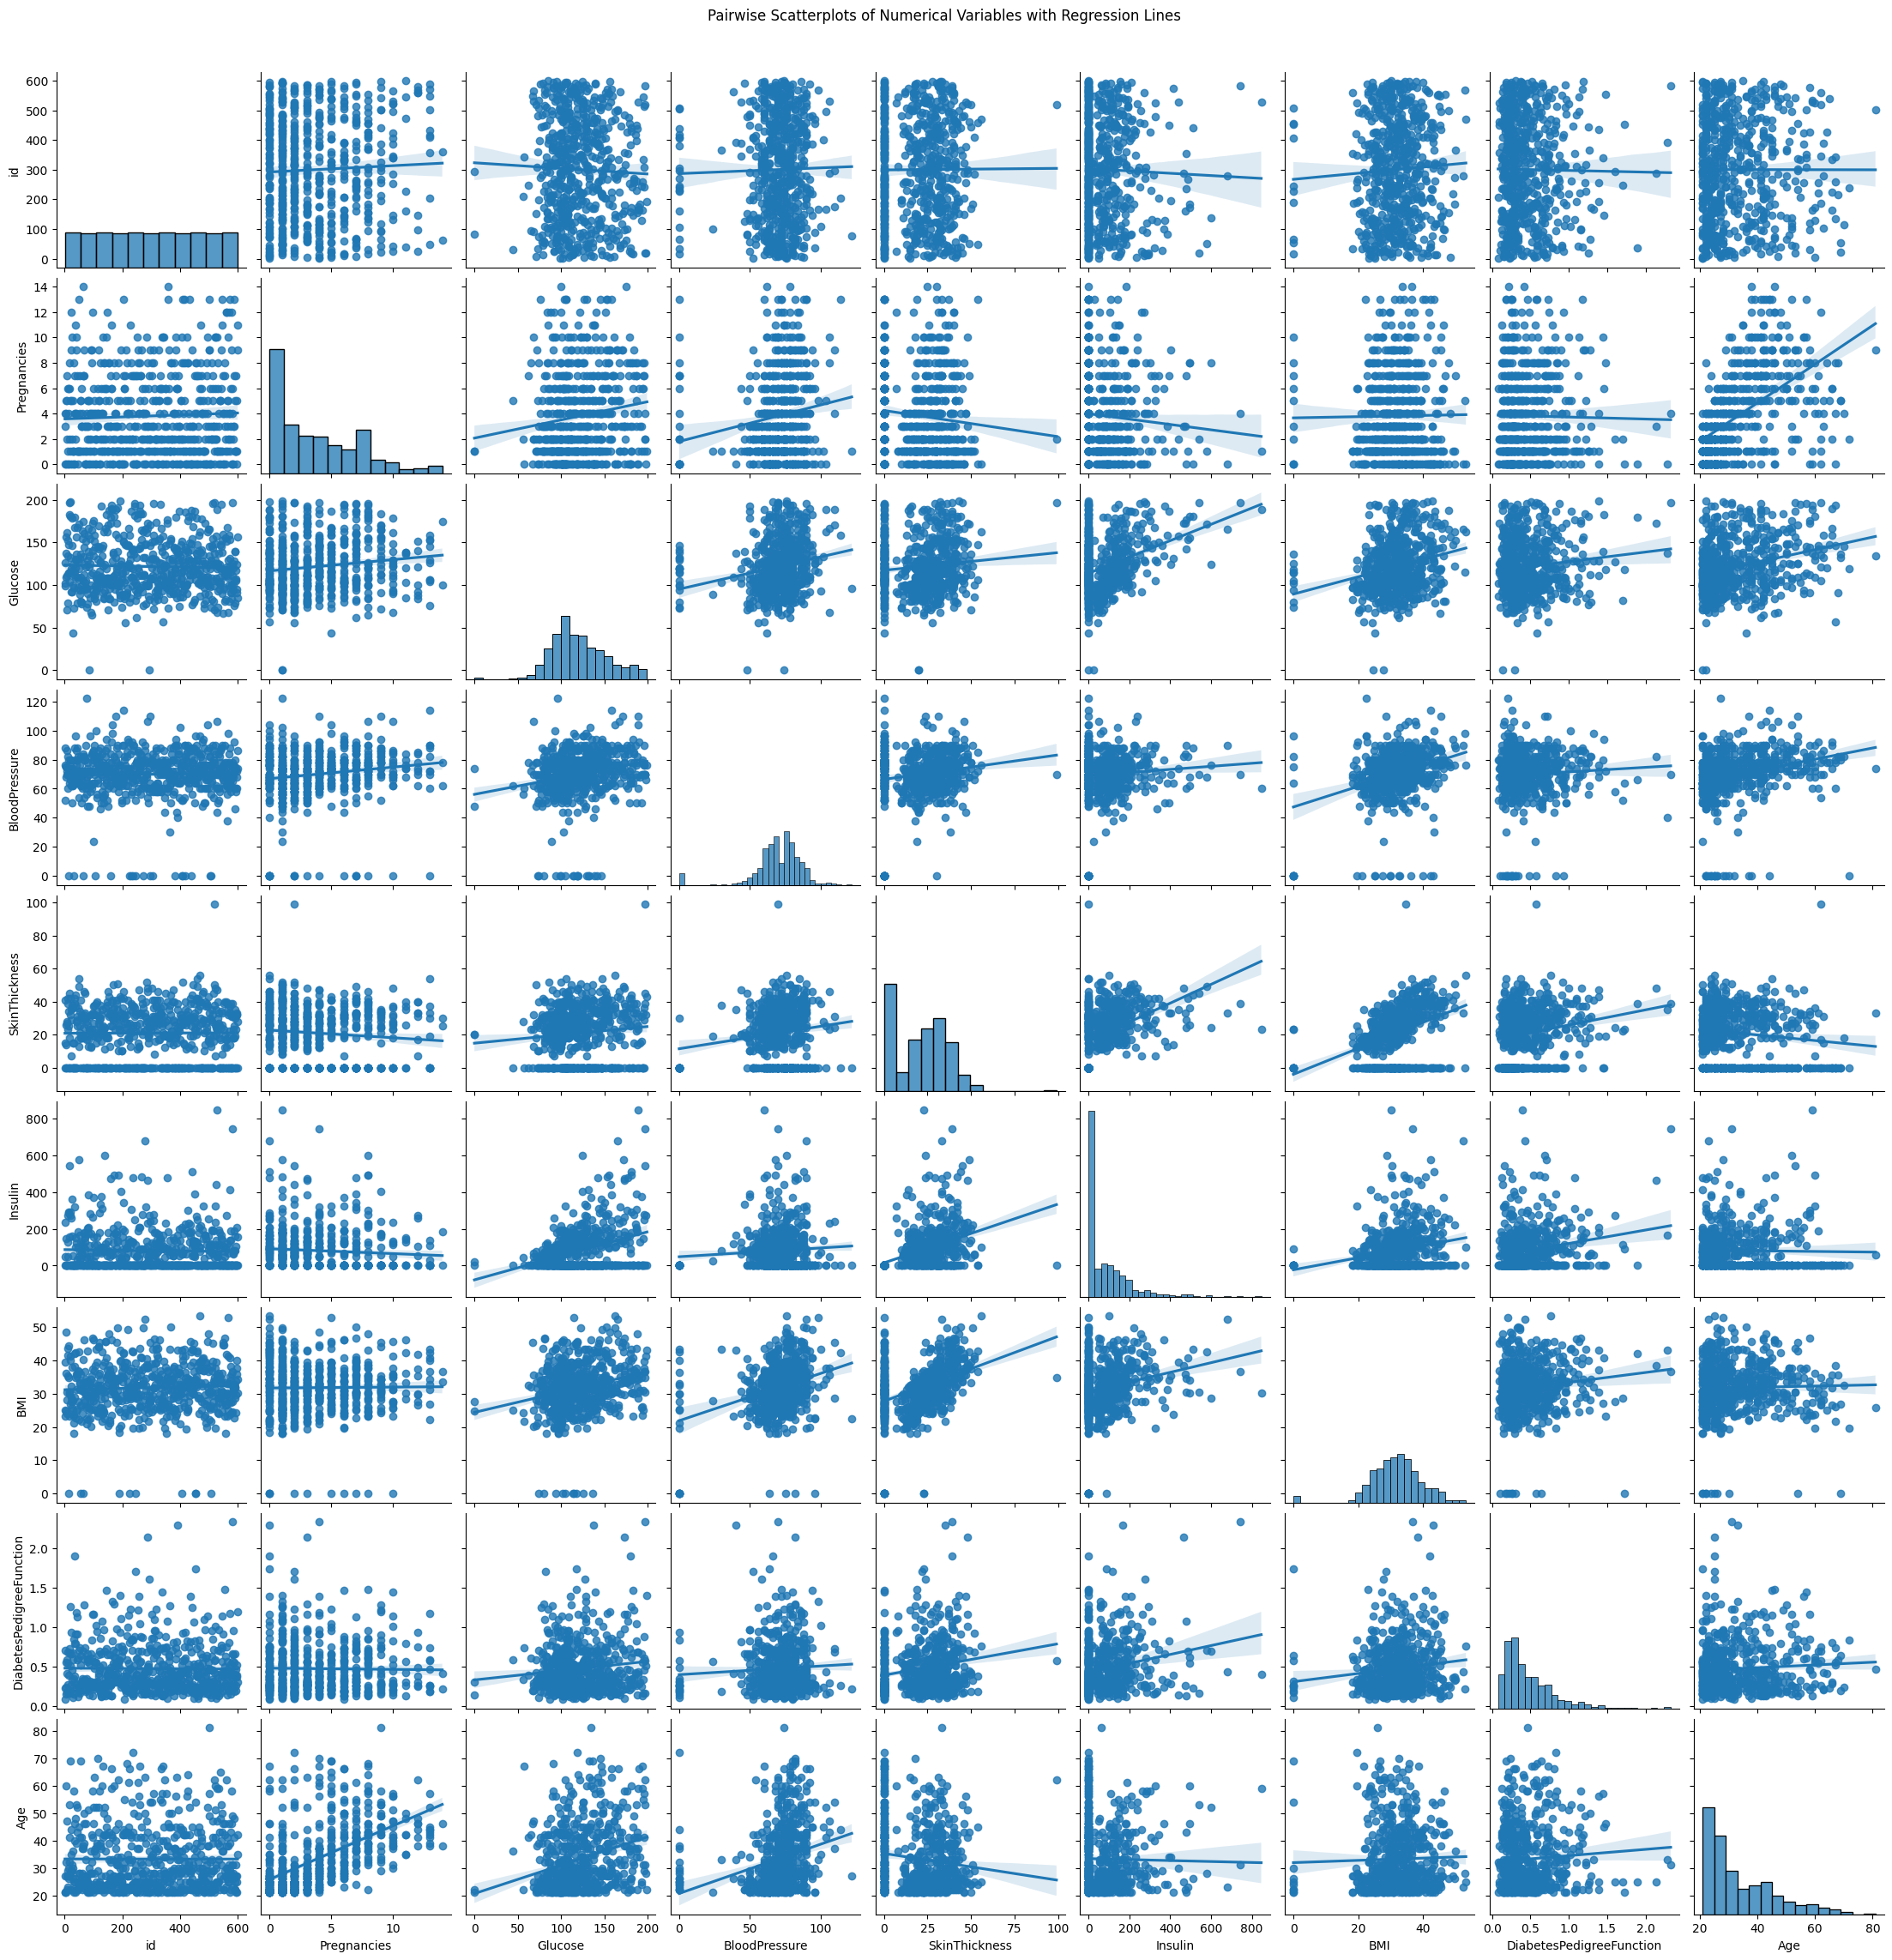

In [13]:
#Visualizing numerical columsn containing large range of entrie values.
unique_counts = df.nunique()
selected_columns = unique_counts[unique_counts > 4].index

df_selected = df[selected_columns]

for col in df_selected.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

# Box plots for numerical variables
for col in df_selected.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(df_selected.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

# Data Normalization

<Figure size 1200x1000 with 0 Axes>

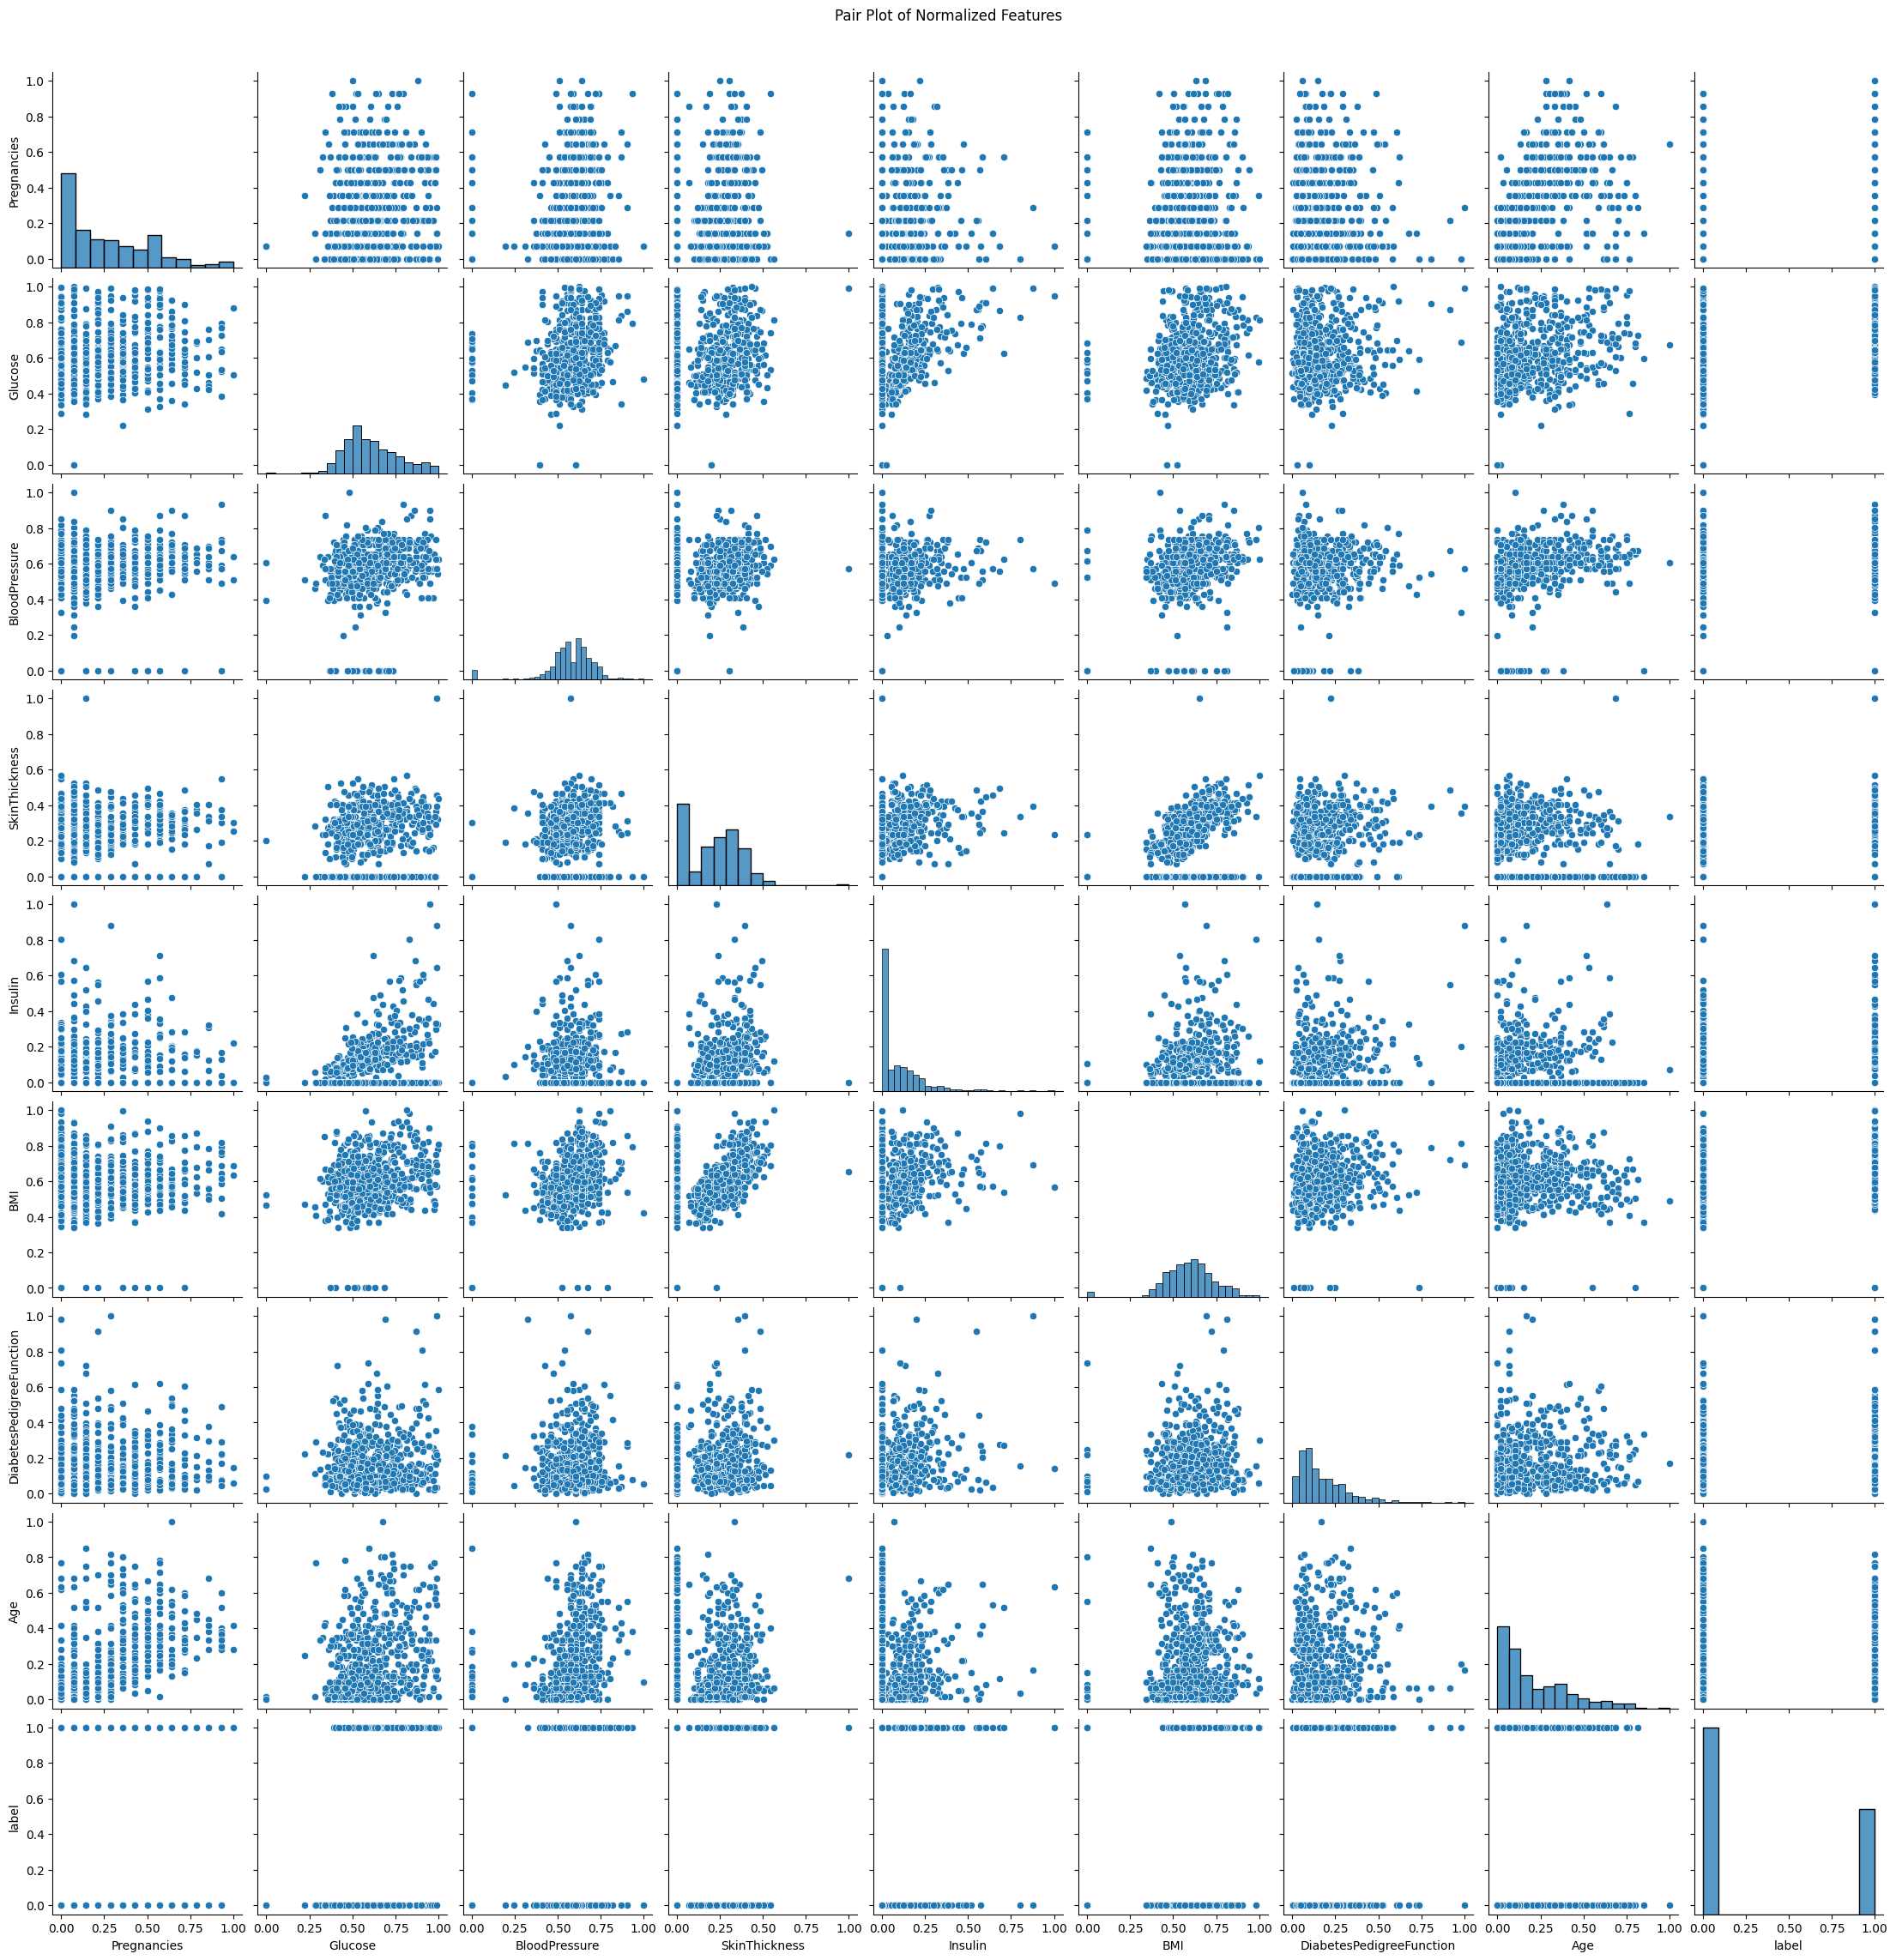

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df):
    """
    Normalize the numerical values in a DataFrame to the range [0, 1].

    Parameters:
    df (pd.DataFrame): The DataFrame containing numerical values to be normalized.

    Returns:
    pd.DataFrame: A new DataFrame with normalized values.
    """
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data
    df_normalized = df.copy()  # Make a copy to avoid changing the original DataFrame
    df_normalized[df.columns] = scaler.fit_transform(df)

    return df_normalized


df = pd.read_csv('train[1].csv')

# Drop non-numeric columns if needed
df_numeric = df.drop(columns=['id'])

# Normalize the DataFrame
df_normalized = normalize_dataframe(df_numeric)

# Create a pair plot of the normalized features
plt.figure(figsize=(12, 10))
sns.pairplot(df_normalized)
plt.suptitle("Pair Plot of Normalized Features", y=1.02)
plt.show()


#Machine Learning Model

In [14]:
X = df.drop(columns=['id', 'label'])  # Drop 'id' and 'label' columns
y = df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Metrics

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.79
Confusion Matrix:
[[69  5]
 [20 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        74
           1       0.84      0.57      0.68        46

    accuracy                           0.79       120
   macro avg       0.81      0.75      0.76       120
weighted avg       0.80      0.79      0.78       120



In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


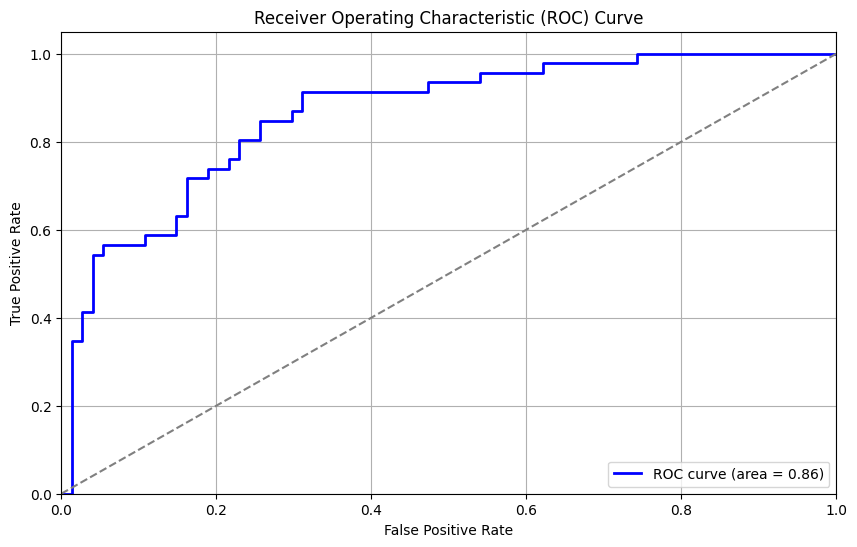

In [18]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
